# Assignment 4 COMP 4304
## SOHAYIB SAZID FAHIM
### 202148771
### MAR 10, 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Question 1

In [2]:
df1 = pd.read_csv('population.csv')
df2 = pd.read_csv('olympic_athletes.csv')
df = pd.read_csv('game_consoles.csv')

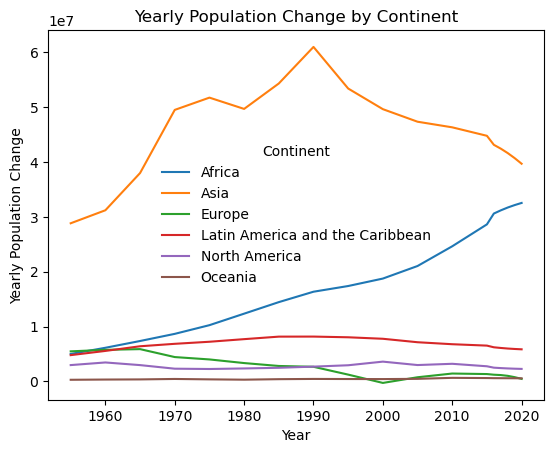

In [3]:
sort_data = df1.groupby(['Year', 'Continent']).sum().reset_index()

sns.lineplot(x='Year', y='YearlyChange', hue='Continent', data=sort_data, sort=False)

plt.title('Yearly Population Change by Continent')
plt.xlabel('Year')
plt.ylabel('Yearly Population Change')
plt.legend(title='Continent',loc='center',framealpha=0)

## Question 2

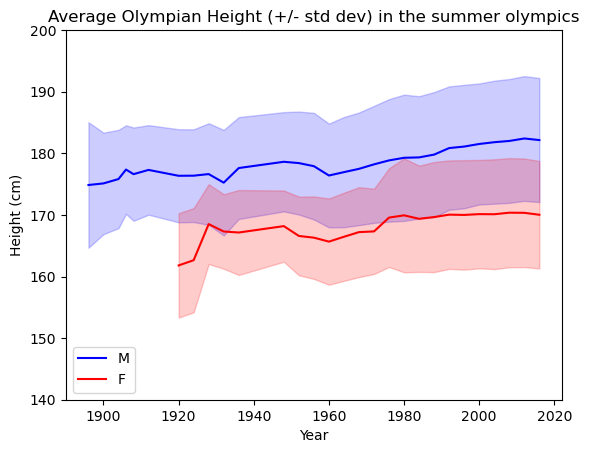

In [4]:
summer = df2[(df2.Season == 'Summer')]
summer = summer[['Year', 'Name', 'Sex', 'Height']].drop_duplicates().dropna()

# color = ['blue', 'red']
# sns.set_palette(['blue', 'red'])
sns.lineplot(x = 'Year', y = 'Height', data=summer, hue='Sex', ci = 'sd', estimator = np.mean, palette=['blue','red'])

plt.ylim(140,200)
plt.title('Average Olympian Height (+/- std dev) in the summer olympics')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.legend( loc='lower left')

## Question 3

In [5]:
size = 0.4
c2mic = ['#EA6727'] * 14
c2nin = ['#5599CC'] * 4
c2sony = ['#83C143'] * 7
c2 = np.concatenate((c2mic, c2sony, c2nin))

colors = ['#156EAF','#DB2018','#56B45B']
color = ['#5599CC', '#EA6727', '#83C143']

names = ['Microsoft', 'Nintendo', 'Sony']

company = df.groupby('Company').sum()['Units_sold'].values

console = df.groupby('Console').sum().reset_index().sort_values(by = 'Units_sold', ascending = False)['Units_sold'].values

con = pd.concat([df[df.Company == 'Nintendo'].sort_values('Units_sold'), df[df.Company == 'Sony'].sort_values('Units_sold'),df[df.Company == 'Microsoft'].sort_values('Units_sold')]).reset_index()
con.sort_index(ascending = True)

fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(con.Units_sold, labels = con.Console, colors = c2, radius = 1, startangle = 41, labeldistance=1.05, wedgeprops={'edgecolor': 'white', 'width':0.4})
ax.pie(company, labels=names, colors=colors, radius = 1 - size, wedgeprops={'edgecolor': 'white'}, labeldistance=0.6, textprops = {'color':'white'})

ax.set_title('Best selling Video Game Console', fontsize = 15)